In [1]:
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

%matplotlib inline

# Read the Data

We will compare recordings at 15, 40 and 80cm distance from the camera.

In [5]:
e15 = pd.read_csv("data/distances/15cm/events.csv")
l15 = pd.read_csv("data/distances/15cm/labels.csv")

e40 = pd.read_csv("data/distances/40cm/events.csv")
l40 = pd.read_csv("data/distances/40cm/labels.csv")

e80 = pd.read_csv("data/distances/80cm/events.csv")
l80 = pd.read_csv("data/distances/80cm/labels.csv")

# Plotting the Event Densities

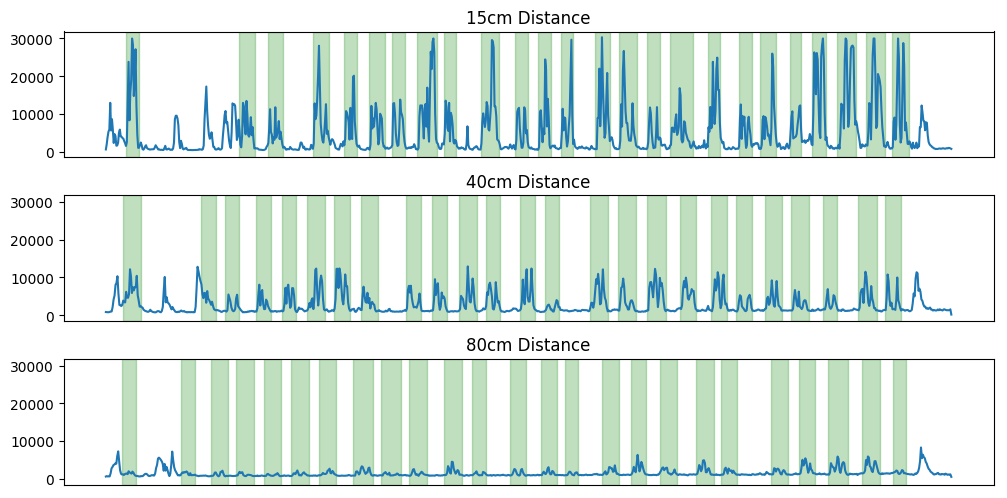

In [24]:
import matplotlib.transforms as mtrans
def plot_labels(labels, ax):
    trans = mtrans.blended_transform_factory(ax.transData, ax.transAxes)
    
    for _, l in labels.iterrows():
        ax.fill_between([l["start"], l["end"]], 0, 1, color="g", alpha=0.25, transform=trans)

def event_density(events, bin_length=10**5):
    ts = events["timestamp"].as_matrix()
    ts_min, ts_max = ts.min(), ts.max()
    length = ts_max - ts_min
    nbins = int(np.ceil(length / bin_length))
    bin_edges = np.linspace(ts_min, ts_min + nbins * bin_length, num=nbins, endpoint=True)
    hist, _ = np.histogram(ts, bins=bin_edges)
    bin_centers = (bin_edges + bin_length / 2)[:-1]
    
    return bin_centers, hist

def plot_density(events, ax):
    X, Y = event_density(events)
    
    ax.plot(X, Y)

fig, ax = pp.subplots(3, 1, dpi=100, figsize=(12, 6), sharey=True)

for axis in ax:
    axis.xaxis.set_visible(False)

# fig.suptitle("Events per 100ms")
fig.subplots_adjust(hspace=0.3)
ax[0].set_title("15cm Distance")
plot_density(e15, ax[0])
plot_labels(l15, ax[0])
ax[1].set_title("40cm Distance")
plot_density(e40, ax[1])
plot_labels(l40, ax[1])
ax[2].set_title("80cm Distance")
plot_density(e80, ax[2])
plot_labels(l80, ax[2])

In [25]:
fig.savefig("../doc/figures/distances.pdf", bbox_inches="tight")